# Mini Batch GDA
## Predicting Minimum Temperature
This notebook is the third in a 3 part series of GDA (or gradient descent algorithms), and contains the code for basic Mini Batch Gradient Descent Algorithm from scratch. The algorithm has been used to train the Linear Regression Model on the Weather data present with a simple hypothesis function $h(\theta)=X\cdot\theta$.

Note: This notebook can be read as a standalone and is not connected to other parts in anyway.

The important required libraries are first imported.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

Using pandas library, the file is imported into the notebook and a sample is printed to see the columns and their names.

In [2]:
df = pd.read_csv("Summary of Weather.csv")
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA
0,10001,01/07/1942,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,NaN,NaN,78,72,75.0
1,10001,02/07/1942,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,NaN,NaN,84,71,78.0
2,10001,03/07/1942,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,NaN,NaN,79,72,76.0
3,10001,04/07/1942,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,NaN,NaN,80,72,76.0
4,10001,05/07/1942,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,NaN,NaN,80,71,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118536,82506,27/12/1945,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,12,27,0,NaN,NaN,83,65,74.0
118537,82506,28/12/1945,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,12,28,0.39,NaN,NaN,85,65,75.0
118538,82506,29/12/1945,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,12,29,0,NaN,NaN,83,65,74.0
118539,82506,30/12/1945,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,12,30,0,NaN,NaN,83,65,74.0


The data shown was already analyzed and cleaned before starting this notebook. A linear relationship was observed between Maximum and Minimum Temperatures as expected. Hence these 2 columns are used, with Maximum temperature as an independent variable and Minimum temperature as a dependent variable.

In [4]:
X_org = np.asarray(df.MAX.values)
y = np.asarray(df.MIN.values)

Now, a column of 1s is used added in the matrix of X to account for the y-intercepts in the hypothesis. It should be noted that the data is not broken into train and test datasets, since it was not in the scope of the task that was required to be done.

In [5]:
m = len(y)
X = np.vstack((np.ones(m), X_org.T)).T

In [6]:
X.shape

(118541, 2)

Using plot library for the scatter plot, to visualize the data, although it was already visualized on Excel. It is possible to normalize this data, however this is a simple problem and is not of necessity here.

Text(0, 0.5, 'MIN')

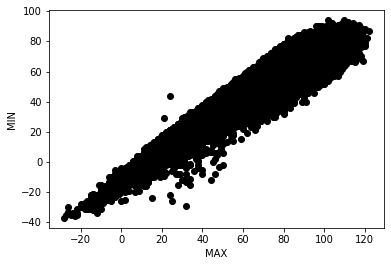

In [7]:
plt.scatter(X[:,[1]], y,  color='black') 
plt.xlabel("MAX")
plt.ylabel("MIN")

Selecting random values of theta to plot the line and see it is an example on the plot.

Text(0, 0.5, 'MIN')

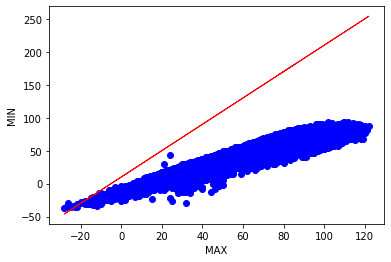

In [8]:
theta_0 = 10.0
theta_1 = 2.0

# the vector theta is initialized with theta_0 and theta_1
theta = np.asarray([theta_0,theta_1]).astype(float)

# Plot the data
plt.scatter(X[:,[1]], y,  color='blue') 

# Plot a red line corrensponding to our Hypothesis model.
plt.plot(X[:,[1]], np.sum(np.multiply(X,theta), axis=1), color='red', linewidth=1)

# Put labels
plt.xlabel("MAX")
plt.ylabel("MIN")

The Mean Squared Error (MSE) cost function is defined below. Then the cost is calculated for the random theta values that were chosen above.

In [9]:
def CostFunction(X, y, theta):

    m = len(y) 
    J = 0 
    h = np.sum(np.multiply(X, theta), axis=1)
    
    # Calculate the Squared Error = (h - y)^2 (vectorized)
    SquaredError = np.power(np.subtract(h,y), 2)
    
    # Calculate the Cost J
    J = 1/(2*m) * np.sum(SquaredError)
    
    return J

In [ ]:
CostFunction(X,y,theta)

5974.120274841616

Generating random values of theta, the cost is calculated for them. This allows for choosing the starting point with the smallest cost, so the number of iterations can be minimized.

In [10]:
import random # import the random library 

print ("[Th0 Th1]", "\tJ") # write an header

for x in range(10):
    theta_0 = random.randint(1,101)
    theta_1 = random.randint(1,101)   
    theta = np.asarray([theta_0, theta_1]).astype(float)
    # Calculate J and print the table
    print (theta, CostFunction(X, y, theta))

[Th0 Th1] 	J
[ 1. 13.] 506176.2540049435
[84. 40.] 5482930.522059878
[48. 42.] 5919399.383803916
[82. 43.] 6324614.875380671
[62. 83.] 23332566.38026084
[70. 61.] 12636341.82413258
[ 3. 10.] 289605.98919361236
[ 6. 32.] 3317522.4045984093
[49. 72.] 17478616.717447974
[19. 95.] 30242252.219299655


Now, the most important algorithm, Mini Batch Gradient Descent is defined below, taking in all the necessary arguments. It creates smaller samples or batches from the entire dataset, hence the name mini batch. It is central to the mini batch gradient descent that is being done here.

In [14]:
def mini_batch_gradient_descent(X, y, theta, alpha=0.01, epochs=100, batch_size=32):
    m, n = X.shape
    num_batches = int(np.ceil(m / batch_size))
    
    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = min(start_idx + batch_size, m)
            X_batch = X_shuffled[start_idx:end_idx]
            y_batch = y_shuffled[start_idx:end_idx]
            
            # Compute the gradient of the cost function
            gradients = 2 / batch_size * X_batch.T.dot(X_batch.dot(theta) - y_batch)
            
            # Update the weights
            theta = theta - alpha * gradients

    cost = CostFunction(X, y, theta)
    return theta, cost

Running the gradient descent with initial values -20 and 5, and for only $10$ interations and the batch size set to $512$. Different values of the hyperparameter, alpha or the learning rate were set, but $0.0001$ was found to be the highest at which the values converged.


In [45]:
theta = np.asarray([-20,5]).astype(float)
# Set the Learning Rate
alpha = 0.0001

# Run the gradientDescent() function, and collect the output
theta, cost = mini_batch_gradient_descent(X, y, theta, alpha, 10, 512)

Plotting the new value of theta after gradient descent.

Text(0, 0.5, 'MIN')

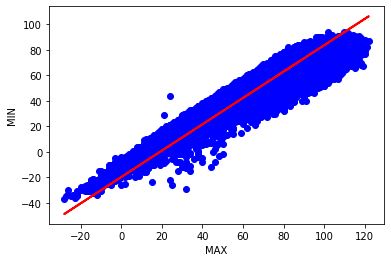

In [46]:
plt.scatter(X[:,[1]], y,  color='blue') 

# Plot a red line corrensponding to the Hypothesis model.
plt.plot(X[:,[1]], np.sum(np.multiply(X,theta), axis=1), color='red', linewidth=2)

# Put labels
plt.xlabel("MAX")
plt.ylabel("MIN")

In [47]:
theta , cost

(array([-19.81601258,   1.03484283]), 28.589079993750367)

From the graph, it can be seen that the line lies on the scatter plot. Also the cost function has been minimized compared to before. It might be possible to reduce it further, so now gradient descent will be done for a second time. You may choose to change the number of epochs or the batch size or both.

In [48]:
theta = np.asarray([-20,5]).astype(float)
alpha = 0.0001
theta, cost = mini_batch_gradient_descent(X, y, theta, alpha, 100, 256)

Text(0, 0.5, 'MIN')

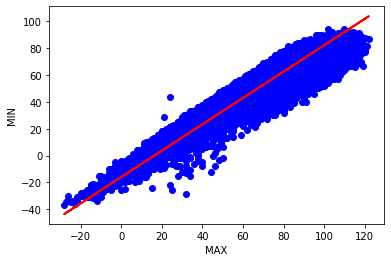

In [49]:
plt.scatter(X[:,[1]], y,  color='blue') 

# Plot a red line corrensponding to the Hypothesis model.
plt.plot(X[:,[1]], np.sum(np.multiply(X,theta), axis=1), color='red', linewidth=2)

# Put labels
plt.xlabel("MAX")
plt.ylabel("MIN")

In [50]:
theta , cost

(array([-16.0368371 ,   0.98281346]), 26.982358260149606)

By increasing the number of epochs or iterations by 10 folds, The values have changed and although not significant but there has been a change to the cost. 

In [51]:
theta = np.asarray([-20,5]).astype(float)
alpha = 0.0001
theta, cost = mini_batch_gradient_descent(X, y, theta, alpha, 10, 32)

Text(0, 0.5, 'MIN')

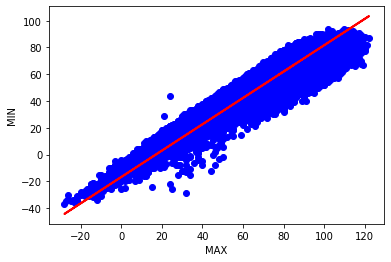

In [52]:
plt.scatter(X[:,[1]], y,  color='blue') 

# Plot a red line corrensponding to the Hypothesis model.
plt.plot(X[:,[1]], np.sum(np.multiply(X,theta), axis=1), color='red', linewidth=2)

# Put labels
plt.xlabel("MAX")
plt.ylabel("MIN")

In [53]:
theta , cost

(array([-16.74732872,   0.98419554]), 27.620367700117338)

By decreasing the batch size by 8 folds, The values have changed and although not significant but there has been a change to the cost.

In [65]:
theta = np.asarray([-20,5]).astype(float)
alpha = 0.0001
theta, cost = mini_batch_gradient_descent(X, y, theta, alpha, 60, 64)

Text(0, 0.5, 'MIN')

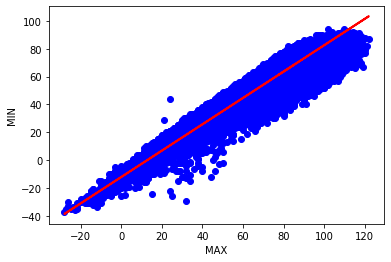

In [66]:
plt.scatter(X[:,[1]], y,  color='blue') 

# Plot a red line corrensponding to the Hypothesis model.
plt.plot(X[:,[1]], np.sum(np.multiply(X,theta), axis=1), color='red', linewidth=2)

# Put labels
plt.xlabel("MAX")
plt.ylabel("MIN")

In [67]:
theta , cost

(array([-12.11531663,   0.94639988]), 25.860201707339847)

By changing both by not much of factor, it can be seen that the values have changed and the cost has decreased as well. However, this change is not big and it was not much necessary to do this. But it is important to choose good and sensible values of epoch and batch_size for higher speed and less usage of resources.

# Conclusion
By comparing the times of this algorithm and the the basic Batch gradient algorithm for the same initial values, it is seen that that the basic batch descent is computationally expensive and time taking. Mini batch did the same with far less iterations and time. Also it is important to learn the art of choosing appropriate values of the number of epochs and the batch size. Furthermore, it can be seen that it also has an edge over the stochastic gradient descent with its speed and accuracy. Hence this algorithm can be considered a mix of both to get the best of both worlds.